# 以下是额外技巧

## 排序及返回索引

In [3]:
import numpy as np

arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])

# 从小到大排序
arr_sorted = np.sort(arr)

# 对应索引
arr_indices = np.argsort(arr)

print(arr_sorted)
print(arr_indices)

[1 1 2 3 3 4 5 5 5 6 9]
[ 1  3  6  0  9  2  4  8 10  7  5]


## 混淆矩阵

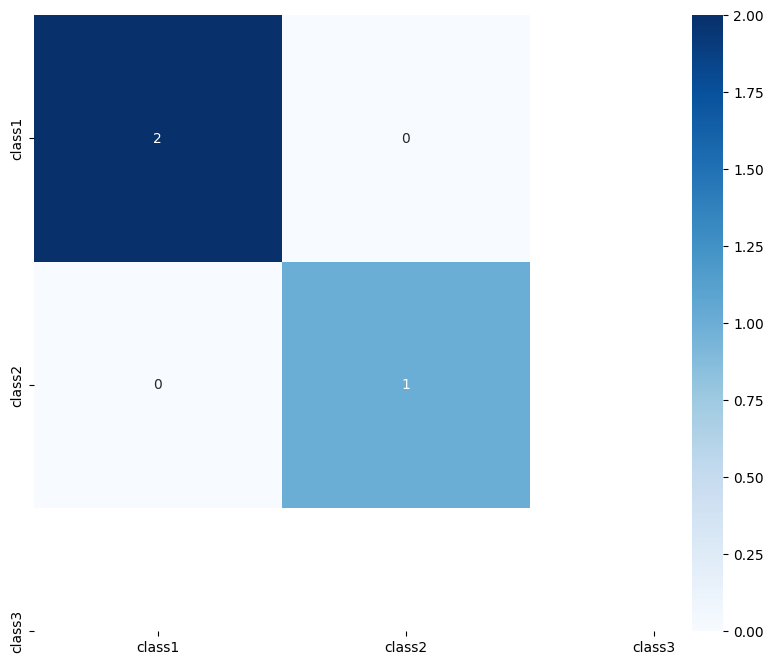

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



def plot_matrix(all_b_y, all_pre_lab, class_label):

    cm = metrics.confusion_matrix(all_b_y, all_pre_lab)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        cmap="Blues",
        annot=True,
        fmt="d",
        xticklabels=class_label,
        yticklabels=class_label,
    )

    plt.show()


plot_matrix([1, 2, 1], [1, 2, 1], ["class1", "class2", "class3"])

## scatter3D

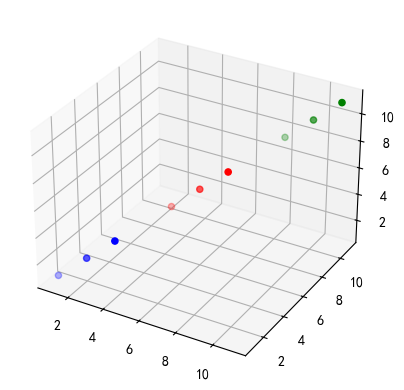

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1, 2, 3], [5, 6, 7], [9, 10, 11]])
y = np.array([[1, 2, 3], [5, 6, 7], [9, 10, 11]])
z = np.array([[1, 2, 3], [5, 6, 7], [9, 10, 11]])
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
color = ["blue", "red", "green"]
for i in range(x.shape[0]):
    ax.scatter(x[i], y[i], z[i], color=color[i])
plt.show()

## 插值

### 一维

In [10]:
from scipy.interpolate import interp1d
import numpy as np

xs = np.arange(10)
ys = 2 * xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


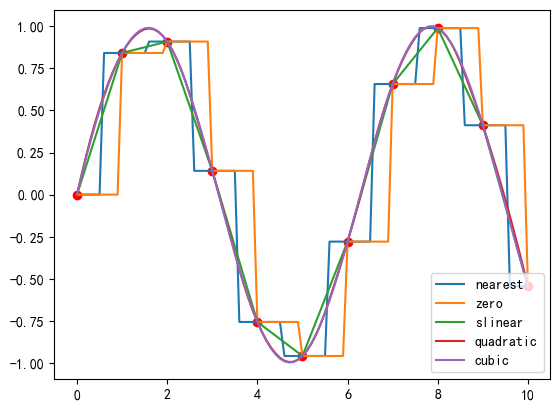

In [11]:
# -*-coding:utf-8 -*-import numpy as np
from scipy import interpolate
import pylab as pl
import numpy as np
 
x=np.linspace(0,10,11)
#x=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
y=np.sin(x)
xnew=np.linspace(0,10,101)
pl.plot(x,y,"ro")
 
for kind in ["nearest","zero","slinear","quadratic","cubic"]:#插值方式#"nearest","zero"为阶梯插值#slinear 线性插值#"quadratic","cubic" 为2阶、3阶B样条曲线插值
    f=interpolate.interp1d(x,y,kind=kind)
    # ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=str(kind))
pl.legend(loc="lower right")
pl.show()

### 二维

C:\Users\78661\AppData\Local\Temp\ipykernel_10016\519508826.py:29: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数# 计算100*100的网格上的插值
C:\Users\78661\AppData\Local\Temp\ipykernel_10016\519508826.py:32: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regula

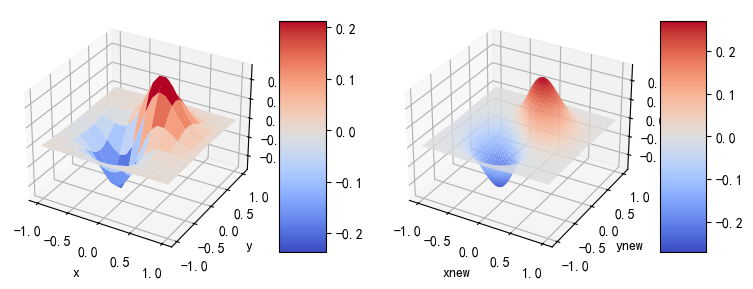

In [12]:
# -*- coding: utf-8 -*-"""
# 演示二维插值。
# -*- coding: utf-8 -*-
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt
 
def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))
 
# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)#20*20的网格数据
 
fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值
 
fig = plt.figure(figsize=(9, 6))
#Draw sub-graph1
ax=plt.subplot(1, 2, 1,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注#二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,150)#x
ynew = np.linspace(-1,1,150)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  np.shape(fnew) is 100*100
xnew, ynew = np.meshgrid(xnew, ynew)
ax2=plt.subplot(1, 2, 2,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5) #标注
 
plt.show()